In [1]:
from keras import models
from keras import layers

import keras
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from keras import models
from keras import layers
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.models import Model, load_model, Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, GlobalAveragePooling2D, Input, Merge, Dropout

%matplotlib inline

data_dir = '/share/gbpolyp/final_data'
work_dir = '/home/obsk/workspace/gbpolyp'

train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')
test_dir = os.path.join(data_dir, 'test')
csv_file = os.path.join(data_dir, 'clinical_data.csv')
def get_clinical_data(csv_file):
    df = pd.read_csv(csv_file)
    df['name'] = df['name'].apply(lambda x: x.split('\\')[-1].split('.')[0])

    d1 = df[df['test']==0]

    size_mean = d1['size'].mean()
    size_std = d1['size'].std()
    df['size'] = df['size'].apply(lambda x: (x - size_mean) / size_std)

    age_mean = d1['age'].mean()
    age_std = d1['age'].std()
    df['age'] = df['age'].apply(lambda x: (x - age_mean) / age_std)
    
    return df


def get_data(dir_name, df):
    count = 0
    for path, dir, files in os.walk(dir_name):
            count += len(files)
    print('total images = %d' % count)

    clinical_data = np.ndarray((count, 3), dtype=np.float32)
    y_data = np.ndarray((count, ), dtype=np.int8)

    i = 0

    for path, dir, files in os.walk(dir_name):
        for file_name in files:
            file_path = os.path.join(path, file_name)
            if os.path.basename(path) == 'neoplastic': y_data[i] = 1
            else: y_data[i] = 0
            name = os.path.basename(file_path)[:-9]
            try:
                size = df[df['name']==name].iloc[0]['size']
                multiplicity = df[df['name']==name].iloc[0]['multiplicity']
                if multiplicity == 1: multiplicity = 0.1
                else: multiplicity = -0.1
                age = df[df['name']==name].iloc[0]['age']
            except IndexError:
                print(name)
                size = 0
                multiplicity = 0
                age = 0
            clinical_data[i] = (size, multiplicity, age)
            i += 1

    #x_data = preprocess_input(x_data)
    
    return clinical_data, y_data

df = get_clinical_data(csv_file)

clinical_train, y_train = get_data(train_dir, df)
clinical_validation, y_validation = get_data(validation_dir, df)
clinical_test, y_test = get_data(test_dir, df)



/home/obsk/anaconda3/envs/naesa1.8/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


total images = 4137
total images = 1033
total images = 885


In [54]:
from keras.regularizers import l2

def get_model(hidden_layer):
    model = models.Sequential()
    model.add(layers.Dense(hidden_layer, kernel_regularizer=l2(0.001), activation='relu', input_dim=3))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(hidden_layer, kernel_regularizer=l2(0.001), activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(hidden_layer, kernel_regularizer=l2(0.001), activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['acc'])
    return model

In [58]:
#model = get_model(4)
model.compile(optimizer=RMSprop(lr=0.00001), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(clinical_train, y_train, validation_data=(clinical_validation, y_validation), epochs=600, batch_size=64, verbose=1)

Train on 4137 samples, validate on 1033 samples
Epoch 1/600
4137/4137 [==============================] - 2s 410us/step - loss: 0.4090 - acc: 0.8264 - val_loss: 0.3285 - val_acc: 0.8674
Epoch 2/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4187 - acc: 0.8214 - val_loss: 0.3285 - val_acc: 0.8674
Epoch 3/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4095 - acc: 0.8245 - val_loss: 0.3285 - val_acc: 0.8674
Epoch 4/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4059 - acc: 0.8269 - val_loss: 0.3285 - val_acc: 0.8674
Epoch 5/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4010 - acc: 0.8296 - val_loss: 0.3285 - val_acc: 0.8674
Epoch 6/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4147 - acc: 0.8267 - val_loss: 0.3285 - val_acc: 0.8674
Epoch 7/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4169 - acc: 0.8252 - val_loss: 0.3285 - val_acc: 0.8674

4137/4137 [==============================] - 0s 69us/step - loss: 0.4018 - acc: 0.8306 - val_loss: 0.3283 - val_acc: 0.8674
Epoch 61/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4120 - acc: 0.8279 - val_loss: 0.3283 - val_acc: 0.8674
Epoch 62/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4035 - acc: 0.8339 - val_loss: 0.3283 - val_acc: 0.8674
Epoch 63/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4033 - acc: 0.8325 - val_loss: 0.3282 - val_acc: 0.8674
Epoch 64/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4134 - acc: 0.8199 - val_loss: 0.3283 - val_acc: 0.8674
Epoch 65/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4125 - acc: 0.8281 - val_loss: 0.3283 - val_acc: 0.8674
Epoch 66/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4085 - acc: 0.8293 - val_loss: 0.3283 - val_acc: 0.8674
Epoch 67/600
4137/4137 [==============================

Epoch 120/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4030 - acc: 0.8351 - val_loss: 0.3281 - val_acc: 0.8712
Epoch 121/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4066 - acc: 0.8279 - val_loss: 0.3281 - val_acc: 0.8712
Epoch 122/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4017 - acc: 0.8301 - val_loss: 0.3280 - val_acc: 0.8712
Epoch 123/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4070 - acc: 0.8228 - val_loss: 0.3280 - val_acc: 0.8712
Epoch 124/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4090 - acc: 0.8264 - val_loss: 0.3280 - val_acc: 0.8712
Epoch 125/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4033 - acc: 0.8272 - val_loss: 0.3280 - val_acc: 0.8712
Epoch 126/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4016 - acc: 0.8279 - val_loss: 0.3280 - val_acc: 0.8712
Epoch 127/600
4137/4137 [=========

4137/4137 [==============================] - 0s 69us/step - loss: 0.4148 - acc: 0.8255 - val_loss: 0.3278 - val_acc: 0.8761
Epoch 180/600
4137/4137 [==============================] - 0s 70us/step - loss: 0.4114 - acc: 0.8277 - val_loss: 0.3278 - val_acc: 0.8761
Epoch 181/600
4137/4137 [==============================] - 0s 70us/step - loss: 0.4014 - acc: 0.8320 - val_loss: 0.3278 - val_acc: 0.8790
Epoch 182/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4063 - acc: 0.8250 - val_loss: 0.3278 - val_acc: 0.8790
Epoch 183/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4008 - acc: 0.8351 - val_loss: 0.3277 - val_acc: 0.8761
Epoch 184/600
4137/4137 [==============================] - 0s 70us/step - loss: 0.4047 - acc: 0.8284 - val_loss: 0.3278 - val_acc: 0.8761
Epoch 185/600
4137/4137 [==============================] - 0s 70us/step - loss: 0.4045 - acc: 0.8235 - val_loss: 0.3278 - val_acc: 0.8761
Epoch 186/600
4137/4137 [=======================

4137/4137 [==============================] - 0s 70us/step - loss: 0.4083 - acc: 0.8281 - val_loss: 0.3275 - val_acc: 0.8790
Epoch 239/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4035 - acc: 0.8322 - val_loss: 0.3275 - val_acc: 0.8790
Epoch 240/600
4137/4137 [==============================] - 0s 70us/step - loss: 0.4007 - acc: 0.8313 - val_loss: 0.3274 - val_acc: 0.8790
Epoch 241/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4153 - acc: 0.8192 - val_loss: 0.3274 - val_acc: 0.8790
Epoch 242/600
4137/4137 [==============================] - 0s 70us/step - loss: 0.4032 - acc: 0.8327 - val_loss: 0.3275 - val_acc: 0.8790
Epoch 243/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4049 - acc: 0.8281 - val_loss: 0.3275 - val_acc: 0.8790
Epoch 244/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4089 - acc: 0.8274 - val_loss: 0.3275 - val_acc: 0.8790
Epoch 245/600
4137/4137 [=======================

4137/4137 [==============================] - 0s 69us/step - loss: 0.4048 - acc: 0.8325 - val_loss: 0.3272 - val_acc: 0.8790
Epoch 298/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4052 - acc: 0.8293 - val_loss: 0.3272 - val_acc: 0.8790
Epoch 299/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4105 - acc: 0.8264 - val_loss: 0.3272 - val_acc: 0.8790
Epoch 300/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4085 - acc: 0.8281 - val_loss: 0.3272 - val_acc: 0.8790
Epoch 301/600
4137/4137 [==============================] - 0s 70us/step - loss: 0.4105 - acc: 0.8274 - val_loss: 0.3272 - val_acc: 0.8790
Epoch 302/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4067 - acc: 0.8281 - val_loss: 0.3272 - val_acc: 0.8790
Epoch 303/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4032 - acc: 0.8318 - val_loss: 0.3272 - val_acc: 0.8790
Epoch 304/600
4137/4137 [=======================

4137/4137 [==============================] - 0s 69us/step - loss: 0.4062 - acc: 0.8298 - val_loss: 0.3268 - val_acc: 0.8790
Epoch 357/600
4137/4137 [==============================] - 0s 70us/step - loss: 0.4135 - acc: 0.8289 - val_loss: 0.3268 - val_acc: 0.8790
Epoch 358/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4073 - acc: 0.8257 - val_loss: 0.3268 - val_acc: 0.8790
Epoch 359/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4028 - acc: 0.8339 - val_loss: 0.3268 - val_acc: 0.8790
Epoch 360/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.3967 - acc: 0.8359 - val_loss: 0.3268 - val_acc: 0.8790
Epoch 361/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.3981 - acc: 0.8320 - val_loss: 0.3268 - val_acc: 0.8790
Epoch 362/600
4137/4137 [==============================] - 0s 70us/step - loss: 0.4168 - acc: 0.8262 - val_loss: 0.3268 - val_acc: 0.8790
Epoch 363/600
4137/4137 [=======================

4137/4137 [==============================] - 0s 69us/step - loss: 0.4109 - acc: 0.8286 - val_loss: 0.3265 - val_acc: 0.8790
Epoch 416/600
4137/4137 [==============================] - 0s 70us/step - loss: 0.4064 - acc: 0.8371 - val_loss: 0.3265 - val_acc: 0.8790
Epoch 417/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4079 - acc: 0.8272 - val_loss: 0.3265 - val_acc: 0.8790
Epoch 418/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4162 - acc: 0.8284 - val_loss: 0.3265 - val_acc: 0.8790
Epoch 419/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4044 - acc: 0.8279 - val_loss: 0.3264 - val_acc: 0.8790
Epoch 420/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4022 - acc: 0.8298 - val_loss: 0.3264 - val_acc: 0.8790
Epoch 421/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4052 - acc: 0.8221 - val_loss: 0.3264 - val_acc: 0.8790
Epoch 422/600
4137/4137 [=======================

4137/4137 [==============================] - 0s 69us/step - loss: 0.4085 - acc: 0.8284 - val_loss: 0.3262 - val_acc: 0.8780
Epoch 475/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.3986 - acc: 0.8354 - val_loss: 0.3262 - val_acc: 0.8780
Epoch 476/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4080 - acc: 0.8274 - val_loss: 0.3262 - val_acc: 0.8780
Epoch 477/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4087 - acc: 0.8260 - val_loss: 0.3262 - val_acc: 0.8780
Epoch 478/600
4137/4137 [==============================] - 0s 70us/step - loss: 0.4031 - acc: 0.8310 - val_loss: 0.3262 - val_acc: 0.8780
Epoch 479/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4101 - acc: 0.8303 - val_loss: 0.3262 - val_acc: 0.8780
Epoch 480/600
4137/4137 [==============================] - 0s 70us/step - loss: 0.4047 - acc: 0.8344 - val_loss: 0.3262 - val_acc: 0.8780
Epoch 481/600
4137/4137 [=======================

4137/4137 [==============================] - 0s 70us/step - loss: 0.4077 - acc: 0.8330 - val_loss: 0.3259 - val_acc: 0.8780
Epoch 534/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4060 - acc: 0.8277 - val_loss: 0.3259 - val_acc: 0.8780
Epoch 535/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.3964 - acc: 0.8376 - val_loss: 0.3259 - val_acc: 0.8780
Epoch 536/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4100 - acc: 0.8308 - val_loss: 0.3259 - val_acc: 0.8780
Epoch 537/600
4137/4137 [==============================] - 0s 70us/step - loss: 0.4099 - acc: 0.8267 - val_loss: 0.3259 - val_acc: 0.8780
Epoch 538/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4060 - acc: 0.8279 - val_loss: 0.3259 - val_acc: 0.8780
Epoch 539/600
4137/4137 [==============================] - 0s 70us/step - loss: 0.4035 - acc: 0.8332 - val_loss: 0.3259 - val_acc: 0.8780
Epoch 540/600
4137/4137 [=======================

4137/4137 [==============================] - 0s 70us/step - loss: 0.4069 - acc: 0.8308 - val_loss: 0.3257 - val_acc: 0.8780
Epoch 593/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4051 - acc: 0.8298 - val_loss: 0.3257 - val_acc: 0.8780
Epoch 594/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4029 - acc: 0.8306 - val_loss: 0.3256 - val_acc: 0.8780
Epoch 595/600
4137/4137 [==============================] - 0s 70us/step - loss: 0.4071 - acc: 0.8306 - val_loss: 0.3256 - val_acc: 0.8780
Epoch 596/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.4030 - acc: 0.8272 - val_loss: 0.3256 - val_acc: 0.8780
Epoch 597/600
4137/4137 [==============================] - 0s 70us/step - loss: 0.4070 - acc: 0.8264 - val_loss: 0.3256 - val_acc: 0.8780
Epoch 598/600
4137/4137 [==============================] - 0s 69us/step - loss: 0.3956 - acc: 0.8354 - val_loss: 0.3256 - val_acc: 0.8780
Epoch 599/600
4137/4137 [=======================

In [59]:
model.evaluate(clinical_test, y_test)

885/885 [==============================] - 0s 53us/step


[0.33711980311884043, 0.83728813572792]

In [45]:
def plot_smoothly(history):
    def smooth_curve(points, factor=0.8):
      smoothed_points = []
      for point in points:
        if smoothed_points:
          previous = smoothed_points[-1]
          smoothed_points.append(previous * factor + point * (1 - factor))
        else:
          smoothed_points.append(point)
      return smoothed_points

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))
    
    plt.plot(epochs,
             smooth_curve(acc), 'bo', label='Smoothed training acc')
    plt.plot(epochs,
             smooth_curve(val_acc), 'b', label='Smoothed validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs,
             smooth_curve(loss), 'bo', label='Smoothed training loss')
    plt.plot(epochs,
             smooth_curve(val_loss), 'b', label='Smoothed validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()


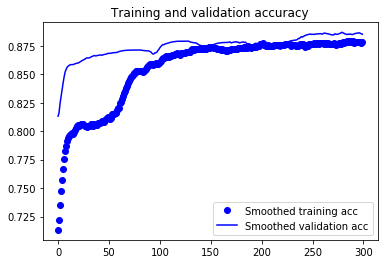

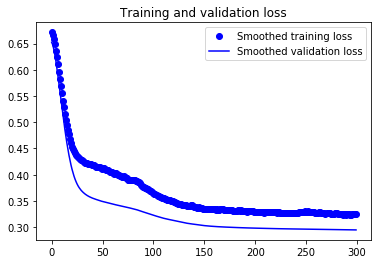

In [41]:
plot_smoothly(history)